In [1]:
# Hello Friends!

# Let us Load essential libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

# Problem Description:
#    1. The median housing prices of various towns inside Boston is to be predicted
#       by using the given predictor variables.
       


In [3]:
#%% Read the data and look at colums
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print ("Train file...")
train.head()

Train file...


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
print ("\nTestfile...")
test.head()


Testfile...


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [5]:
# lets find missing values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [6]:
# Hurrah! no missing values. Doesnt mean no incorrect values though!
# What about test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
ID         173 non-null int64
crim       173 non-null float64
zn         173 non-null float64
indus      173 non-null float64
chas       173 non-null int64
nox        173 non-null float64
rm         173 non-null float64
age        173 non-null float64
dis        173 non-null float64
rad        173 non-null int64
tax        173 non-null int64
ptratio    173 non-null float64
black      173 non-null float64
lstat      173 non-null float64
dtypes: float64(10), int64(4)
memory usage: 19.0 KB


In [7]:
# Lets just have a look at basic data properties
train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [8]:
# Looks like all are continuous variables apart from chas.
# Want to make sure ID  represents the town id. Has to as it not defined in the Kaggle dataset description.Still!

In [9]:
# If Id values in train are all unqiue
print ("Are all values in ID in train file unique? %s"% (
                                len(train.ID.unique()) == len(train)))
  
# If Id values in test are all unqiue
print ("Are all values in ID in test file unique? %s"% (
                                len(test.ID.unique()) == len(test)))

# if No Id values in train present in test?

trainintest = [id1 for id1 in train.ID.values if id1 in test.ID.values ]
print ("No of items of ID in train in test? %s"% (
                                len(trainintest)))


testintrain = [id1 for id1 in test.ID.values if id1 in train.ID.values ]
print ("No of items of ID in test in train? %s"% (
                                len(testintrain)))


Are all values in ID in train file unique? True
Are all values in ID in test file unique? True
No of items of ID in train in test? 0
No of items of ID in test in train? 0


In [10]:
# So, all values in ID are unqiue and we are 100% certain that the represent
# town id.  Since this is just an identifier and of no use in prediction, 
# we will drop it.

train.drop('ID', axis = 1, inplace = 1)

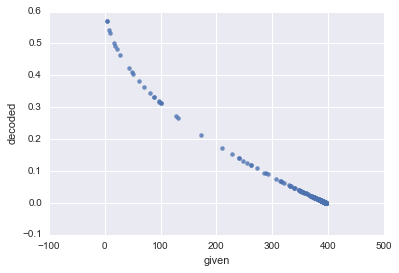

In [11]:
# I dont understand the black variable. The formula 1000(Bk - 0.63)^2 is too complicated to intitutively understand it.
# Hence decoding it.

trainblack = pd.DataFrame({})
trainblack['given'] = train['black']
trainblack['decoded'] = 0.63 - np.sqrt(trainblack/1000) # assumes max black ratio is 0.63
sns.regplot(x = "given", y = "decoded", fit_reg = False, data = trainblack)



In [12]:
# We will assume inverse linear relationship.
# So a Low black value in train means high black population and vice versa
del trainblack

In [13]:
# functiont to plot scatterplots of all independent variables with dependent variables

def scattermatrix(df):

    f, ax1= plt.subplots(4,4, sharey = True,figsize = (20,20) )

    count = 0
    for i in np.arange(4):
        for j in np.arange(4):
            try: 
                sns.set_context(font_scale = 10)
                sns.regplot(df[df.columns[count]], df.medv, ax = ax1[i,j])
                count = count + 1
            except IndexError:
                pass
    plt.subplots_adjust(left = 0.01, right = .99, bottom = 0.12, top = 0.90,
                                wspace = .10, hspace = .12)  


    return 

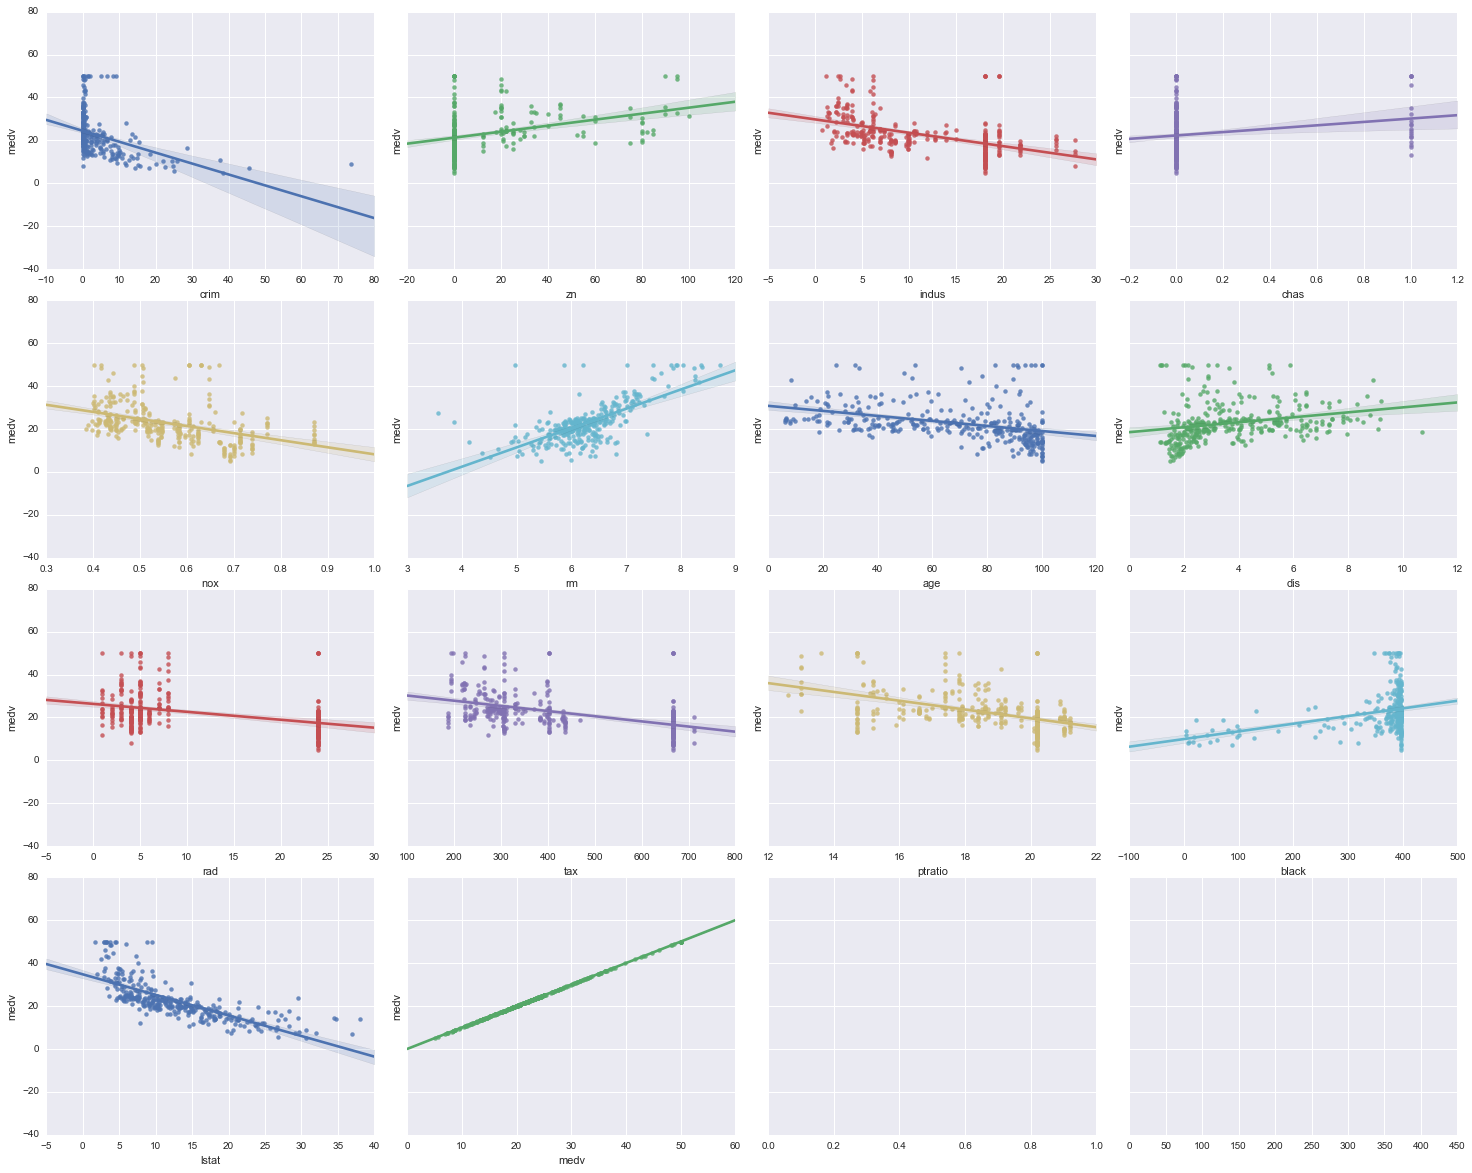

In [14]:
# Lets check the scatterplot of all independent variables with dependent variables
scattermatrix (train)

In [15]:
# Hang on. We will look at relationships. But there is something intriguing which i want to look at before.
# Look at the vertical bars in rad, tax, ptratio, zn, indus. They seem related. Lets explore it.

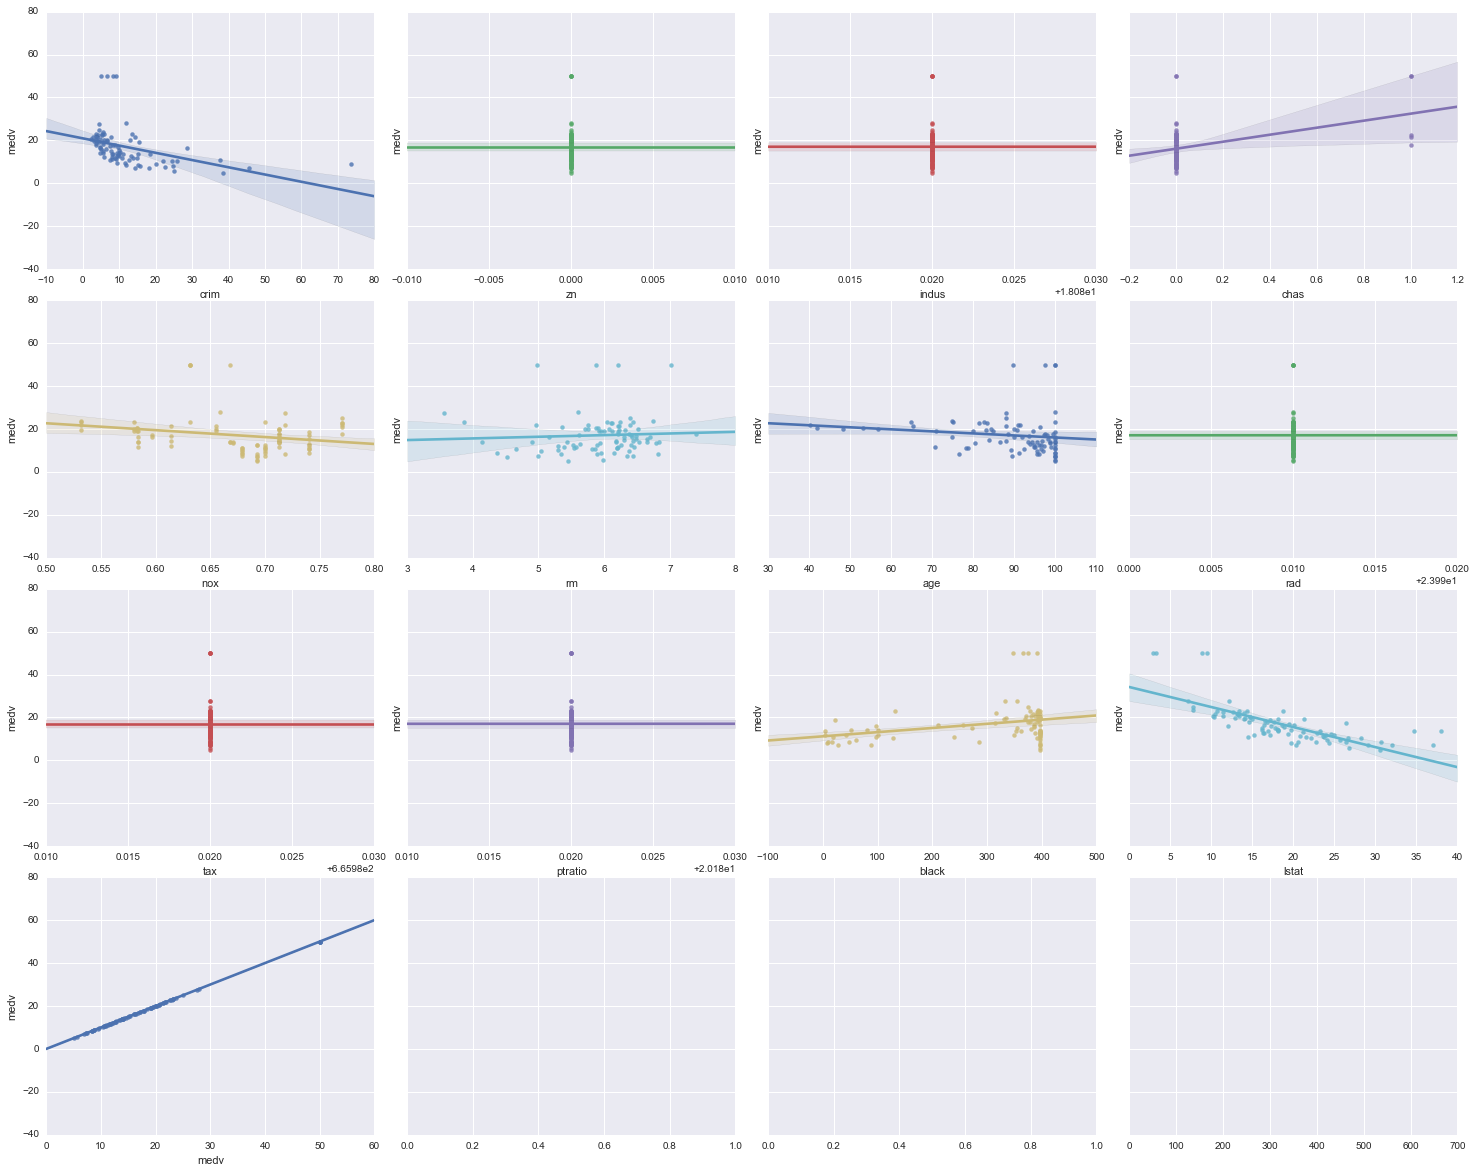

In [43]:
# Easy way to extract the data is rad> 20

train_intriguing = train[train.rad > 15]
fig2= scattermatrix (train_intriguing)
fig2

In [24]:
# Ayela! zn, indus, rad, tax, ptratio same to same. Wat Lag gayi mamu!
# Whats happening:
#    1. Same Broad locatlity: No: then dis would be same.
#    2. Data Error! Yes: looks like

# Solutions: ????
#    1. Mark them as missing value and repopulate? 
#    2. If yes, then what if error propagates in test set?
#    3. Ignore them?  Can't. a few like zn, ptratio etc has some predictive powers.

In [101]:
# Lets focus back on relationships and if we have a problem of multicollinearity

In [29]:
# I want firt look at the problem of multicolinerity. 
# I have a perfect test in mind. Visual test!!!  

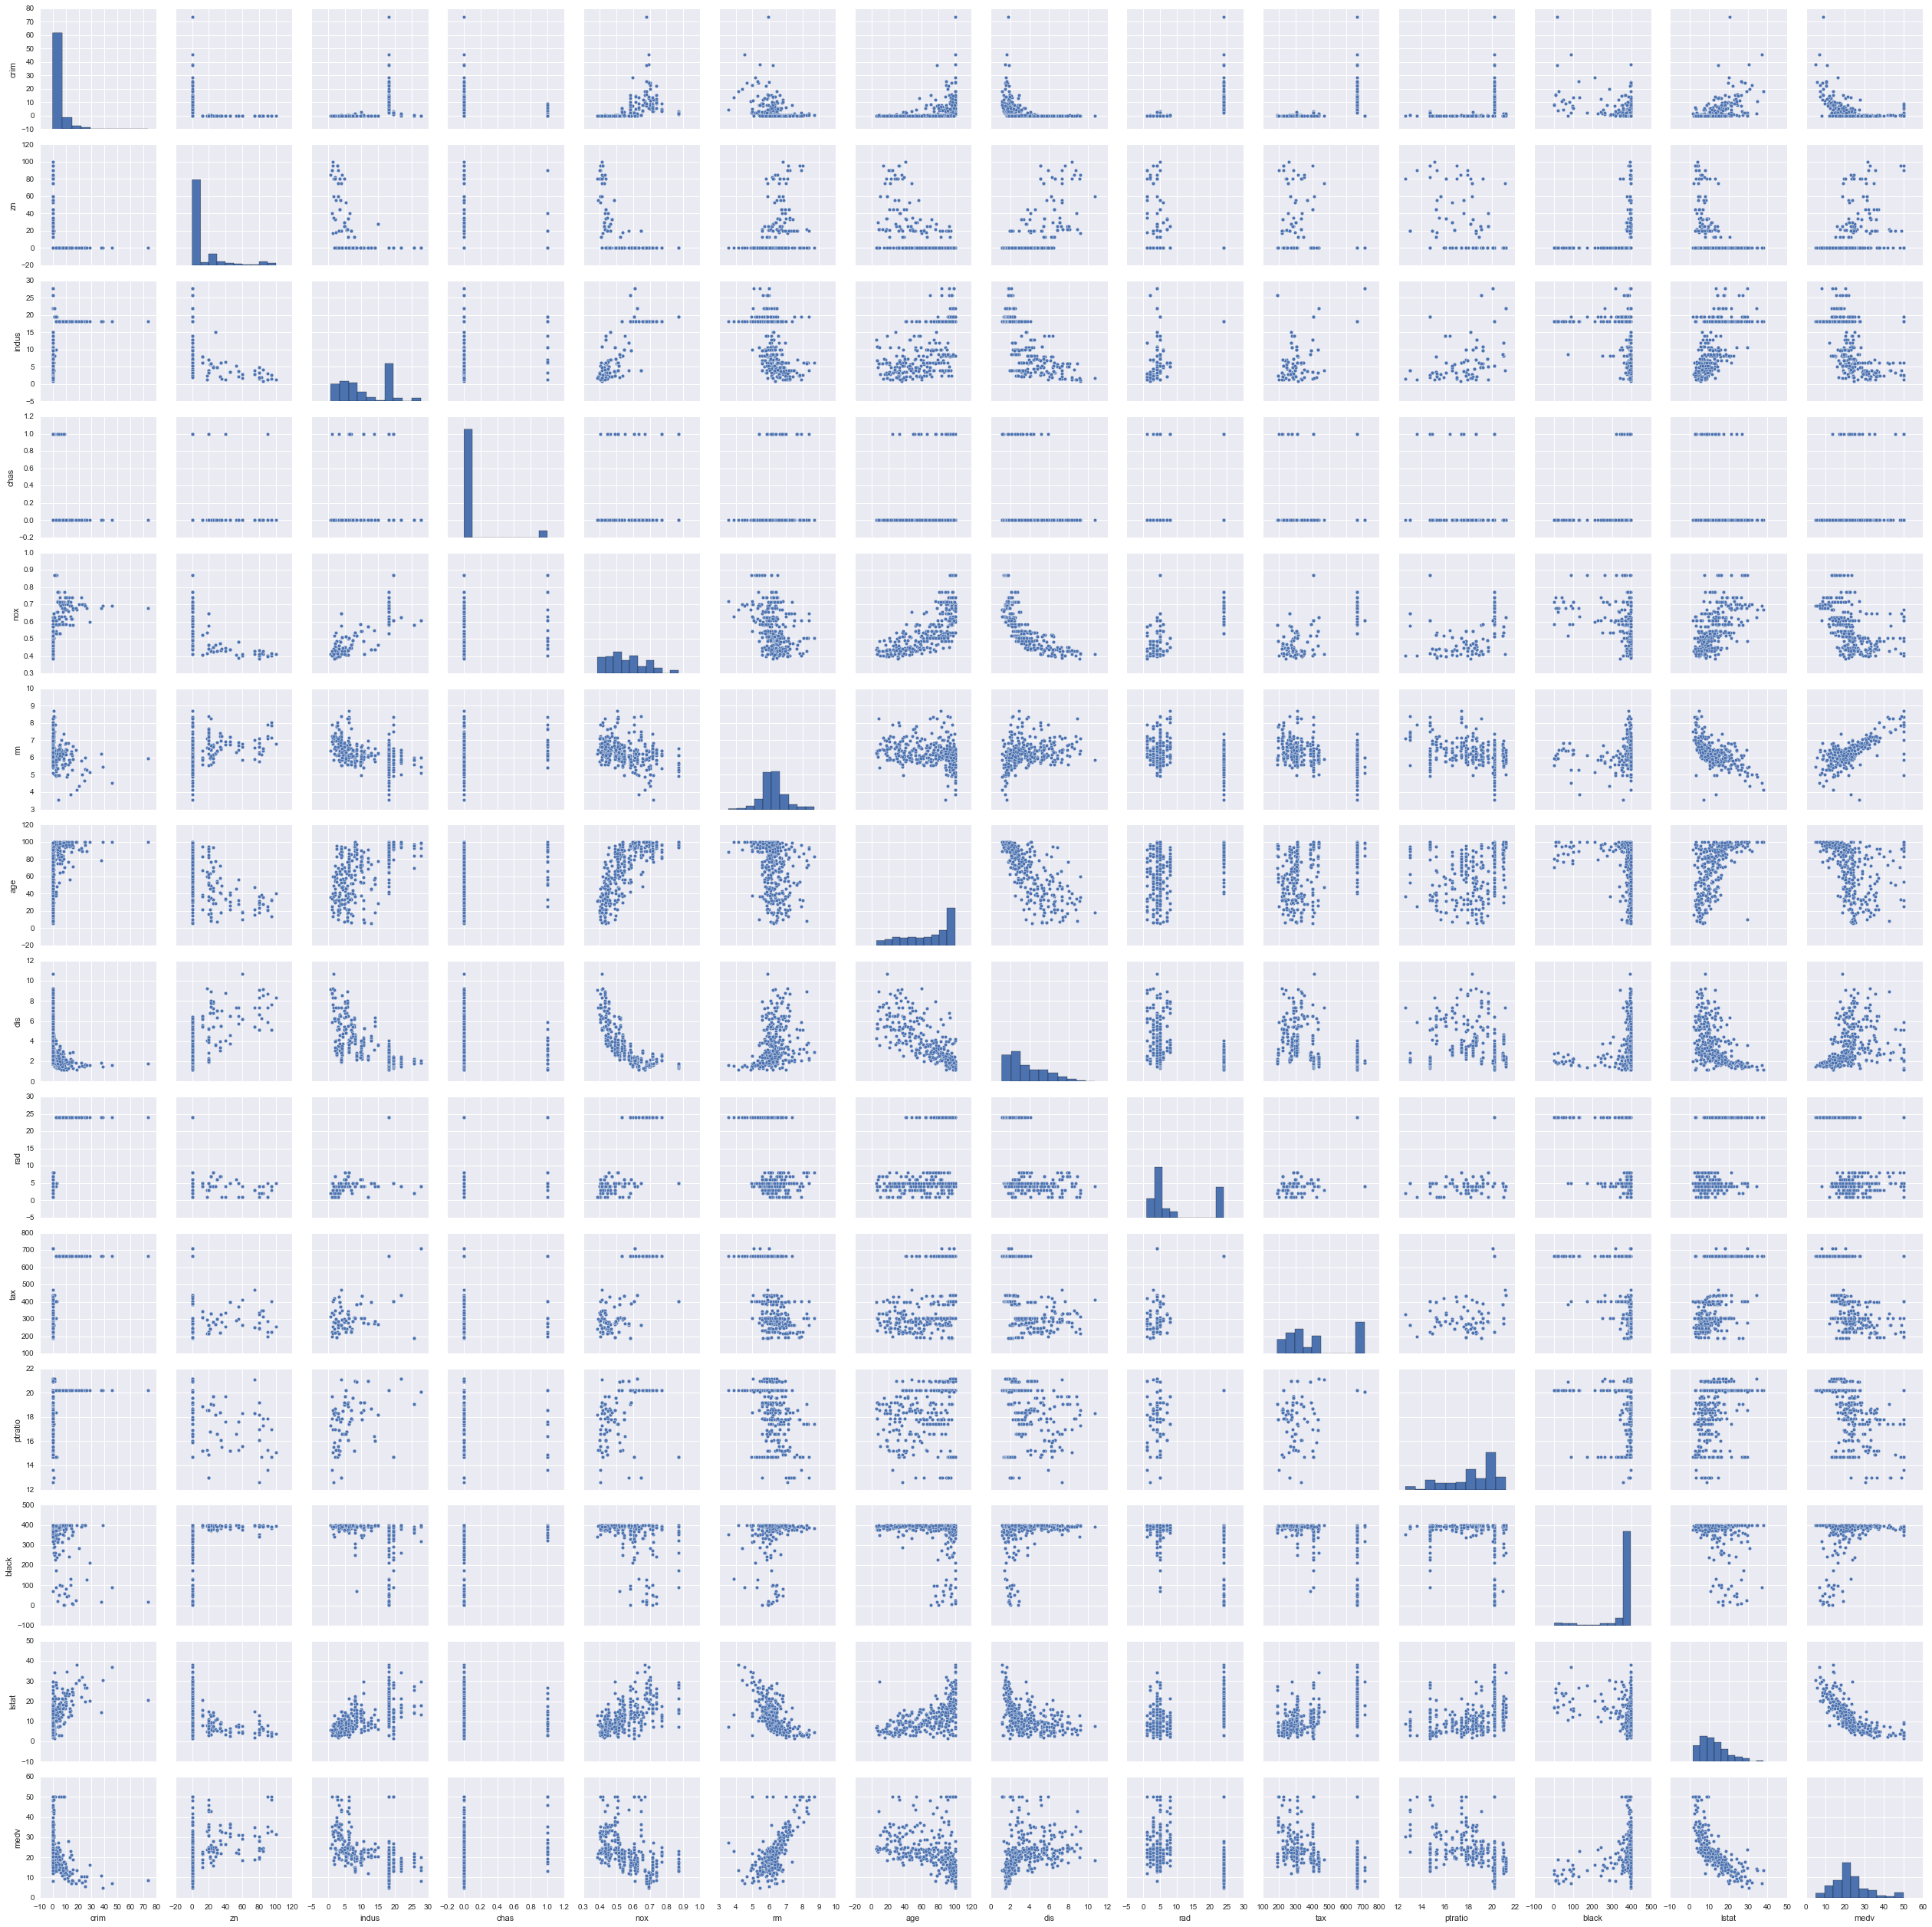

In [48]:
sns.pairplot(train)

In [16]:
# I know too messy!
# Some of correlated vatiables I could find are:
# nox, dis
# rm, lstat
# age, dis

# Lets see each of them

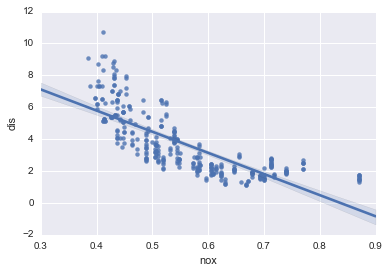

In [17]:
# nox, dis
sns.regplot ("nox", "dis", data = train)

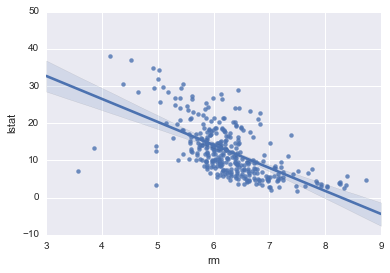

In [18]:
# rm, lstat
sns.regplot ("rm", "lstat", data = train)

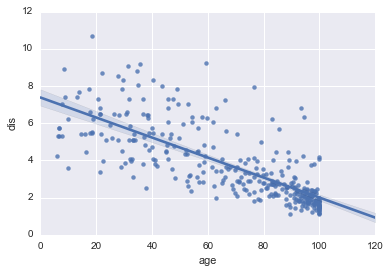

In [19]:
# age, dis
sns.regplot ("age", "dis", data = train)

In [20]:
# Think we should drop one  of nox, dis , while retain other two.

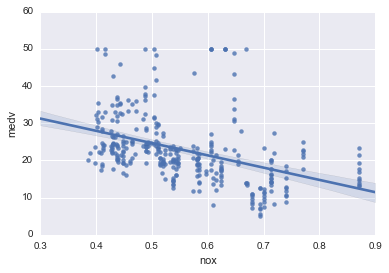

In [21]:

sns.regplot("nox", "medv", data = train)


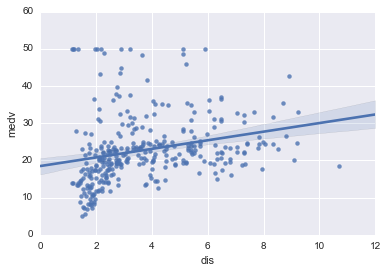

In [22]:
sns.regplot("dis", "medv", data = train)


In [23]:
#  dis is more cattered so will drop it.
train.drop('dis', axis =1, inplace = True)

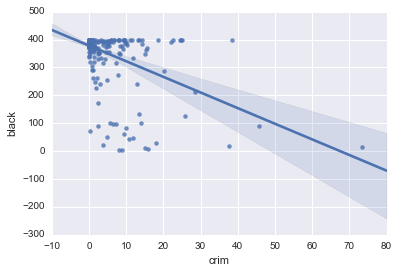

In [24]:
# One more graph for your biased, intolerant people!
sns.regplot("crim", "black", data = train)


In [25]:
# Sorry to diappoint, but absolutely no relationship! Boston is crimefree and also blackfree!

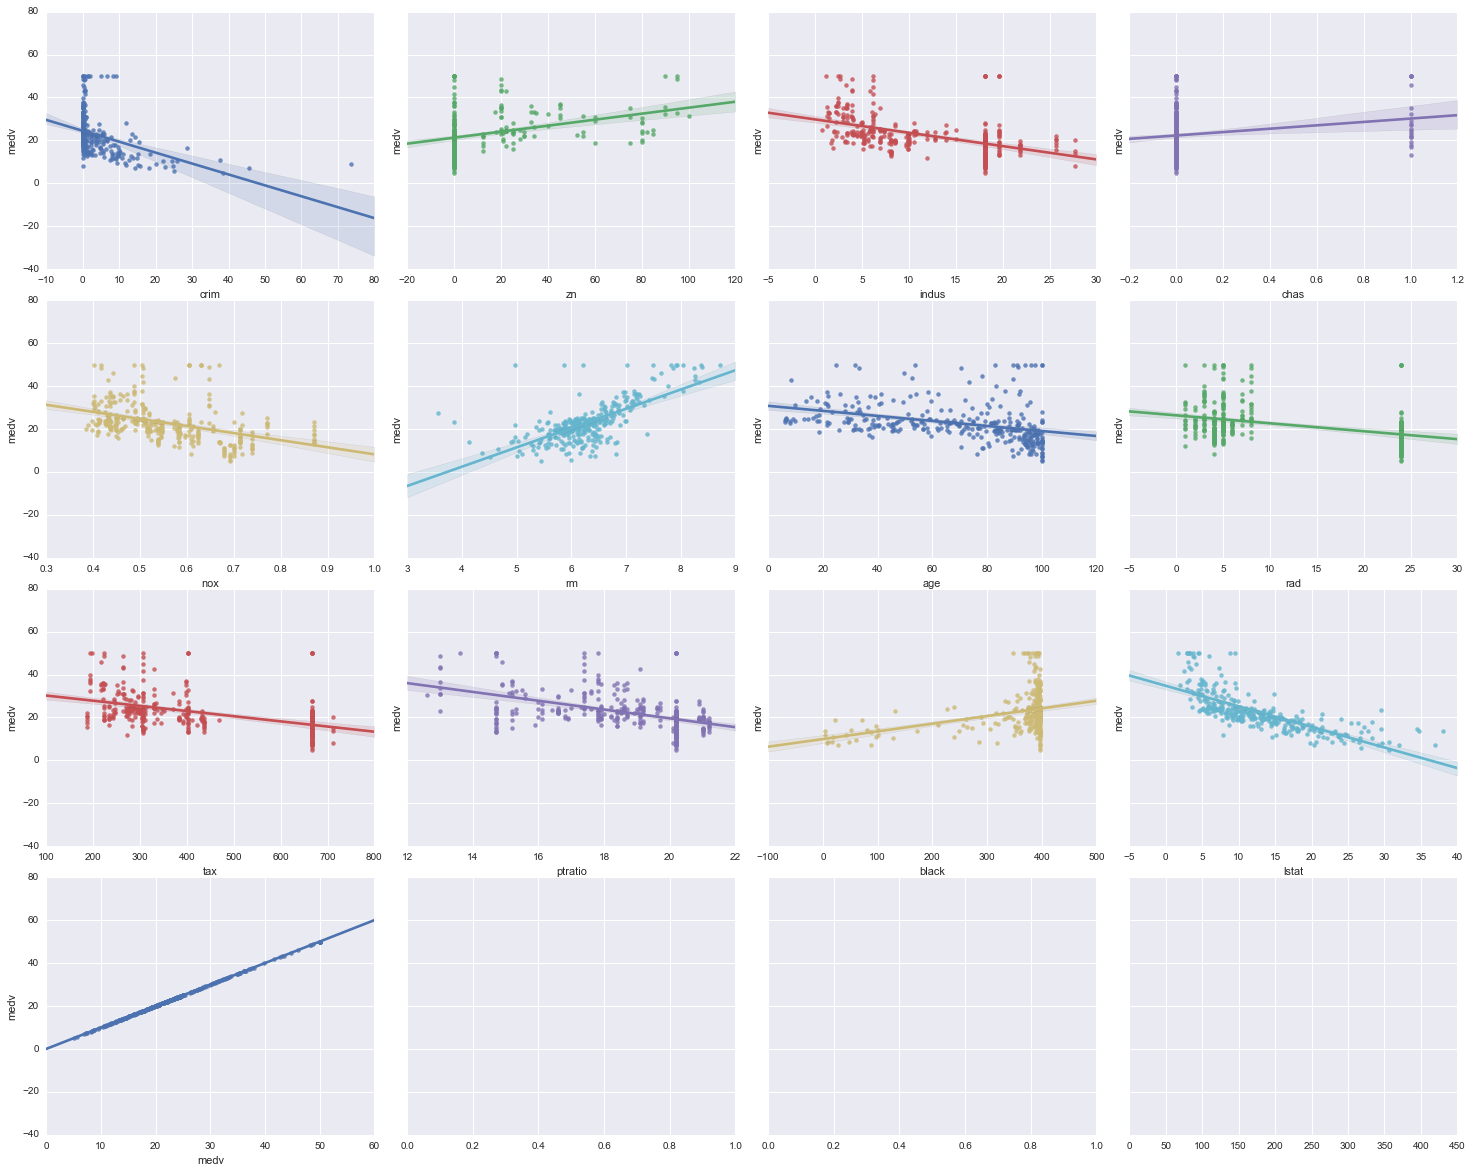

In [26]:
# Now lets check our scattermatix once again!!
fig = scattermatrix (train)
fig

In [ ]:
# rad and tax look irrelevant. So remove
train.drop(['rad', 'tax'], axis = 1, inplace = 1)

In [ ]:
# lets replot
scattermatrix(train)

In [ ]:
# I think it looks good now!!
